In [1]:
# Install gensim if not already
# !pip install gensim

from gensim.models import Word2Vec

# Sample corpus (list of tokenized sentences)
sentences = [
    ["the", "cat", "sits", "on", "the", "mat"],
    ["the", "dog", "sits", "on", "the", "rug"],
    ["the", "cat", "plays", "with", "a", "ball"]
]

# Train CBOW model
model = Word2Vec(
    sentences,
    vector_size=50,  # embedding dimensions
    window=2,        # context window
    min_count=1,     # ignore words appearing less than this
    sg=0             # CBOW if sg=0, Skip-gram if sg=1
)

# Get vector for a word
cat_vector = model.wv['cat']
print("Vector for 'cat':", cat_vector[:10], "...")  # show first 10 dims

# Find similar words
similar_words = model.wv.most_similar('cat', topn=3)
print("Words similar to 'cat':", similar_words)


Vector for 'cat': [ 0.01563514 -0.01902037 -0.00041106  0.00693839 -0.00187794  0.01676354
  0.01802157  0.01307301 -0.00142324  0.01542081] ...
Words similar to 'cat': [('plays', 0.0449172779917717), ('rug', -0.010146040469408035), ('the', -0.014475265517830849)]


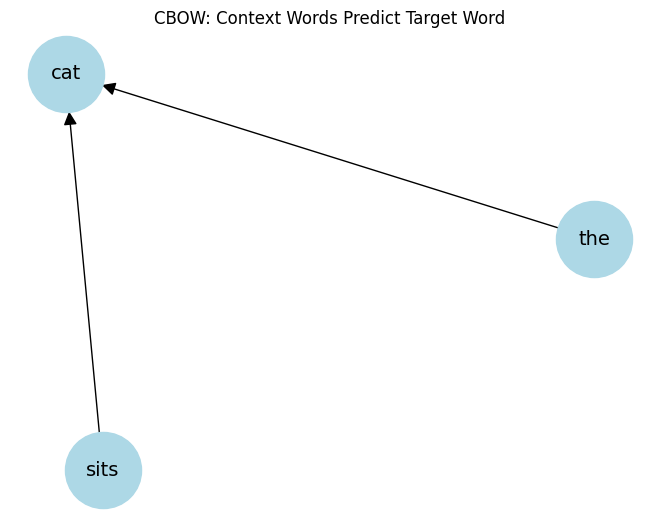

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Example: target word = 'cat', context = ['the', 'sits']
G = nx.DiGraph()
context_words = ['the', 'sits']
target_word = 'cat'

for word in context_words:
    G.add_edge(word, target_word)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=14, arrowsize=20)
plt.title("CBOW: Context Words Predict Target Word")
plt.show()


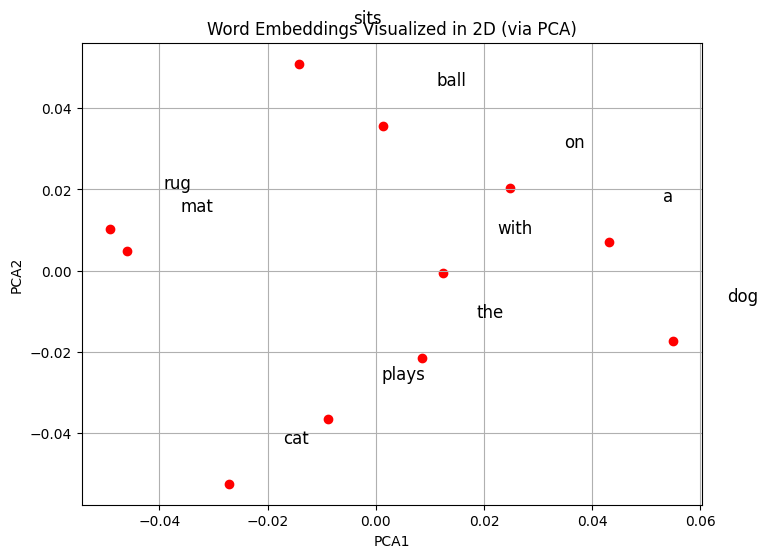

: 

In [ ]:
from sklearn.decomposition import PCA

# Extract word vectors
words = list(model.wv.index_to_key)
vectors = [model.wv[w] for w in words]

# Reduce to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(vectors_2d[:,0], vectors_2d[:,1], color='red')

for i, word in enumerate(words):
    plt.text(vectors_2d[i,0]+0.01, vectors_2d[i,1]+0.01, word, fontsize=12)

plt.title("Word Embeddings Visualized in 2D (via PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()


---

**Key Takeaways**

* CBOW is **fast**, works well for **frequent words**.
* Word embeddings capture **semantic similarity**: words in similar contexts have similar vectors.
* Once trained, these vectors can be used in downstream tasks like **text classification, clustering, recommendation**, etc.

